In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("/kaggle/input/global-ai-job-market-and-salary-trends-2025/ai_job_dataset.csv")

In [3]:
data.head()

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics
1,AI00002,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,2024-11-20,2025-01-11,1268,5.2,TechCorp Inc
2,AI00003,AI Specialist,152626,USD,MI,FL,Switzerland,L,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,2025-03-18,2025-04-07,1974,9.4,Autonomous Tech
3,AI00004,NLP Engineer,80215,USD,SE,FL,India,M,India,50,"Scala, SQL, Linux, Python",PhD,7,Consulting,2024-12-23,2025-02-24,1345,8.6,Future Systems
4,AI00005,AI Consultant,54624,EUR,EN,PT,France,S,Singapore,100,"MLOps, Java, Tableau, Python",Master,0,Media,2025-04-15,2025-06-23,1989,6.6,Advanced Robotics


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   job_id                  15000 non-null  object 
 1   job_title               15000 non-null  object 
 2   salary_usd              15000 non-null  int64  
 3   salary_currency         15000 non-null  object 
 4   experience_level        15000 non-null  object 
 5   employment_type         15000 non-null  object 
 6   company_location        15000 non-null  object 
 7   company_size            15000 non-null  object 
 8   employee_residence      15000 non-null  object 
 9   remote_ratio            15000 non-null  int64  
 10  required_skills         15000 non-null  object 
 11  education_required      15000 non-null  object 
 12  years_experience        15000 non-null  int64  
 13  industry                15000 non-null  object 
 14  posting_date            15000 non-null

In [5]:
data.describe()

,salary_usd,remote_ratio,years_experience,job_description_length,benefits_score
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,115348.965133,49.483333,6.253200,1503.314733,7.504273
std,60260.940438,40.812712,5.545768,576.127083,1.450870
min,32519.000000,0.000000,0.000000,500.000000,5.000000
25%,70179.750000,0.000000,2.000000,1003.750000,6.200000
50%,99705.000000,50.000000,5.000000,1512.000000,7.500000
75%,146408.500000,100.000000,10.000000,2000.000000,8.800000
max,399095.000000,100.000000,19.000000,2499.000000,10.000000


In [6]:
data.isnull().sum()

job_id                    0
job_title                 0
salary_usd                0
salary_currency           0
experience_level          0
employment_type           0
company_location          0
company_size              0
employee_residence        0
remote_ratio              0
required_skills           0
education_required        0
years_experience          0
industry                  0
posting_date              0
application_deadline      0
job_description_length    0
benefits_score            0
company_name              0
dtype: int64

In [7]:
data.duplicated().sum()

0

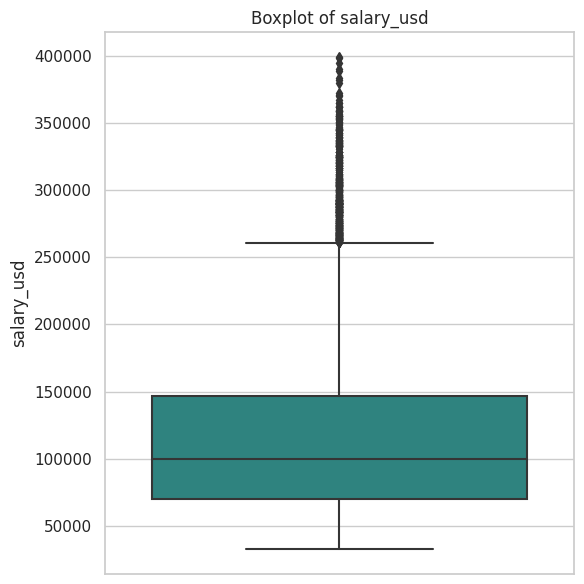

In [8]:
sns.set(style="whitegrid")

plt.figure(figsize=(6, 6))
sns.boxplot(y=data['salary_usd'], palette="viridis")
plt.title(f'Boxplot of salary_usd')
plt.ylabel('salary_usd')

plt.tight_layout()
plt.show()

In [9]:
Q1 = data['salary_usd'].quantile(0.25)
Q3 = data['salary_usd'].quantile(0.75)
IQR = Q3 - Q1
print(f"IQR for salary_usd: {IQR}")

IQR for salary_usd: 76228.75


In [10]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower bound: {lower_bound}")
print(f"Upper bound: {upper_bound}")

Lower bound: -44163.375
Upper bound: 260751.625


In [11]:
data[data.salary_usd <= 0]

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name


In [12]:
data[data.salary_usd >= upper_bound]

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
48,AI00049,AI Specialist,288815,USD,EX,PT,Switzerland,S,Switzerland,0,"Deep Learning, Git, Data Visualization, Linux,...",Bachelor,12,Manufacturing,2024-08-08,2024-09-23,1930,7.2,Cognitive Computing
67,AI00068,Machine Learning Engineer,316182,USD,EX,PT,Denmark,M,Canada,0,"Python, Scala, Statistics, Git",Associate,12,Finance,2025-02-09,2025-02-23,2452,7.0,Digital Transformation LLC
79,AI00080,AI Research Scientist,284486,USD,EX,CT,United States,M,United States,0,"PyTorch, Linux, SQL",Master,12,Consulting,2025-02-13,2025-03-10,2231,7.0,TechCorp Inc
98,AI00099,Machine Learning Researcher,290199,USD,EX,CT,Switzerland,L,Denmark,50,"Python, AWS, Kubernetes, Deep Learning",Master,12,Retail,2025-01-12,2025-03-07,1137,5.6,Smart Analytics
137,AI00138,Machine Learning Engineer,324557,USD,EX,FT,Denmark,L,Denmark,100,"Hadoop, Python, Git, TensorFlow",PhD,11,Telecommunications,2024-11-06,2024-11-24,1209,7.3,Machine Intelligence Group
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14916,AI14917,Principal Data Scientist,307237,USD,EX,CT,United States,L,United States,0,"SQL, Hadoop, Docker, Statistics",PhD,14,Energy,2025-04-09,2025-05-23,1773,8.8,DataVision Ltd
14917,AI14918,ML Ops Engineer,273053,USD,EX,FT,Norway,L,Norway,50,"TensorFlow, GCP, AWS, MLOps",PhD,11,Healthcare,2024-03-12,2024-04-07,500,6.0,Cognitive Computing
14956,AI14957,Machine Learning Engineer,292760,USD,EX,PT,Denmark,L,Germany,50,"Hadoop, SQL, Docker, Computer Vision",Master,19,Retail,2024-08-30,2024-10-23,728,8.7,Future Systems
14977,AI14978,Research Scientist,325968,USD,EX,CT,Norway,M,Israel,100,"Python, Spark, MLOps, Computer Vision, Deep Le...",Associate,10,Technology,2024-07-17,2024-09-13,1514,9.8,Quantum Computing Inc


In [13]:
data[data.salary_usd == data.salary_usd.max()]

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
9891,AI09892,Machine Learning Researcher,399095,USD,EX,PT,Switzerland,L,Switzerland,0,"Linux, Python, TensorFlow",Master,10,Retail,2024-07-10,2024-09-02,2277,9.7,TechCorp Inc


In [14]:
data.drop(['job_id', 'job_description_length'] , axis=1, inplace=True)


## Questions I asked to the data
*   How much salary_usd by job_title?
*   from each job_title what are the most education_required required?
*   from each job_title what are the most experience_level required?
*   what is the distribution of employment_type?
*   Is there relation between employee_residence and company_location?
*   Is there relation between remote_ratio and employee_residence with company_location?



## Let's answer it by code

In [15]:
data.groupby('job_title')['salary_usd'].mean()

job_title
AI Architect                   117436.513619
AI Consultant                  113671.870739
AI Product Manager             114680.909825
AI Research Scientist          117897.925926
AI Software Engineer           114273.201531
AI Specialist                  120570.758242
Autonomous Systems Engineer    111396.557272
Computer Vision Engineer       113472.707182
Data Analyst                   111321.180501
Data Engineer                  115970.720961
Data Scientist                 115819.008333
Deep Learning Engineer         113725.632312
Head of AI                     118542.968627
ML Ops Engineer                115431.335172
Machine Learning Engineer      118827.919689
Machine Learning Researcher    112621.747525
NLP Engineer                   112670.937008
Principal Data Scientist       116305.219346
Research Scientist             116066.502695
Robotics Engineer              116470.793149
Name: salary_usd, dtype: float64

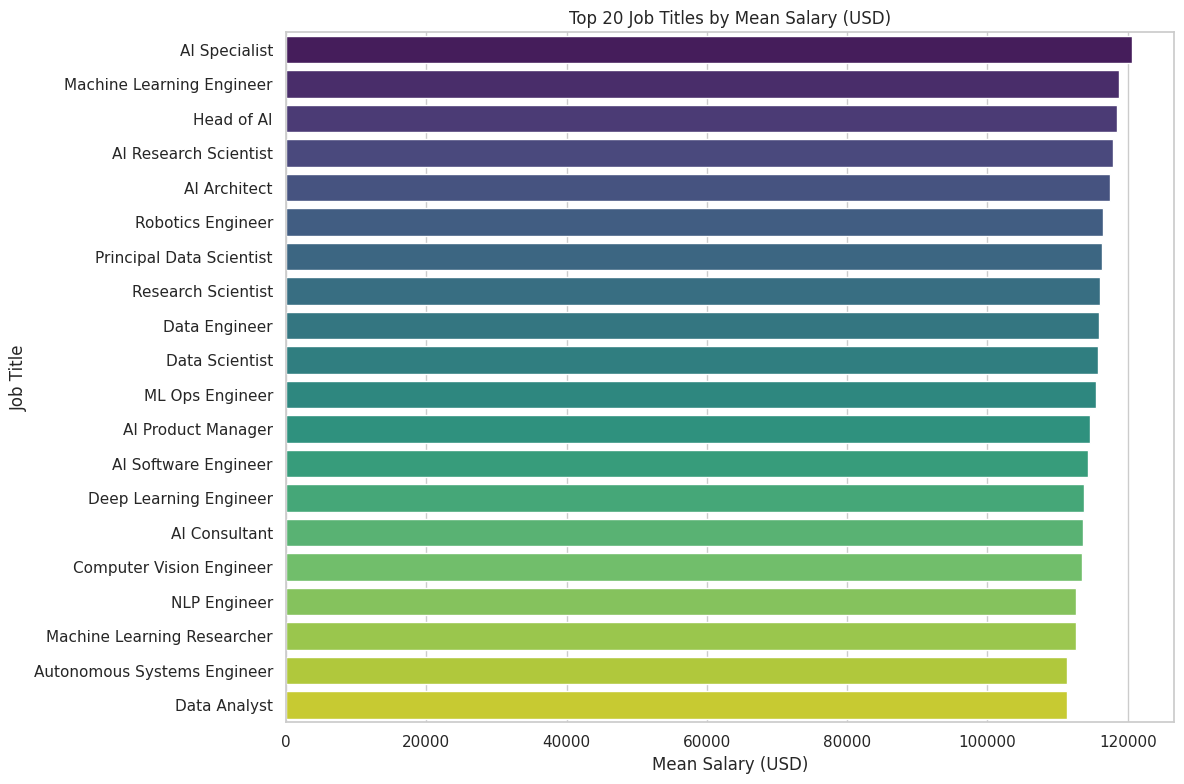

In [16]:
job_salary_mean = data.groupby('job_title')['salary_usd'].mean().sort_values(ascending=False)

top_n = 20
top_job_salary = job_salary_mean.head(top_n)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_job_salary.values, y=top_job_salary.index, palette='viridis')
plt.title(f'Top {top_n} Job Titles by Mean Salary (USD)')
plt.xlabel('Mean Salary (USD)')
plt.ylabel('Job Title')
plt.tight_layout()
plt.show()

In [17]:
education_by_job = pd.crosstab(index=data.job_title,columns=data.education_required)
education_by_job

education_required,Associate,Bachelor,Master,PhD
job_title,,,,
AI Architect,209,180,200,182
AI Consultant,199,166,170,169
AI Product Manager,181,186,190,186
AI Research Scientist,195,186,199,176
AI Software Engineer,199,209,185,191
AI Specialist,174,168,193,193
Autonomous Systems Engineer,204,181,185,207
Computer Vision Engineer,167,180,181,196
Data Analyst,174,208,202,175


In [18]:
print("Most common education required for each job title:", education_by_job.idxmax(axis=1))

Most common education required for each job title: job_title
AI Architect                   Associate
AI Consultant                  Associate
AI Product Manager                Master
AI Research Scientist             Master
AI Software Engineer            Bachelor
AI Specialist                     Master
Autonomous Systems Engineer          PhD
Computer Vision Engineer             PhD
Data Analyst                    Bachelor
Data Engineer                   Bachelor
Data Scientist                  Bachelor
Deep Learning Engineer          Bachelor
Head of AI                      Bachelor
ML Ops Engineer                 Bachelor
Machine Learning Engineer      Associate
Machine Learning Researcher     Bachelor
NLP Engineer                      Master
Principal Data Scientist             PhD
Research Scientist              Bachelor
Robotics Engineer                 Master
dtype: object


In [19]:
experience_by_job = pd.crosstab(index=data.job_title,columns=data.experience_level)
experience_by_job

experience_level,EN,EX,MI,SE
job_title,,,,
AI Architect,155,196,213,207
AI Consultant,173,169,186,176
AI Product Manager,194,186,184,179
AI Research Scientist,187,201,186,182
AI Software Engineer,198,206,210,170
AI Specialist,164,195,180,189
Autonomous Systems Engineer,191,177,204,205
Computer Vision Engineer,171,160,209,184
Data Analyst,200,164,196,199


In [20]:
print("Most common experience level required for each job title:", experience_by_job.idxmax(axis=1))

Most common experience level required for each job title: job_title
AI Architect                   MI
AI Consultant                  MI
AI Product Manager             EN
AI Research Scientist          EX
AI Software Engineer           MI
AI Specialist                  EX
Autonomous Systems Engineer    SE
Computer Vision Engineer       MI
Data Analyst                   EN
Data Engineer                  SE
Data Scientist                 EX
Deep Learning Engineer         EN
Head of AI                     EX
ML Ops Engineer                SE
Machine Learning Engineer      EX
Machine Learning Researcher    EN
NLP Engineer                   EN
Principal Data Scientist       EN
Research Scientist             EN
Robotics Engineer              EX
dtype: object


In [21]:
employment_type_dist = data.employment_type.value_counts()
employment_type_dist

employment_type
FT    3812
FL    3758
CT    3721
PT    3709
Name: count, dtype: int64

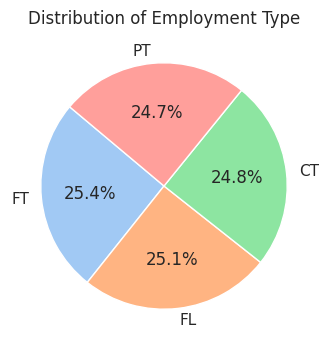

In [22]:
plt.figure(figsize=(4, 4))
plt.pie(employment_type_dist, labels=employment_type_dist.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Distribution of Employment Type')
plt.show()

In [23]:
# Total people living in each country
res_counts = data['employee_residence'].value_counts().reset_index()
res_counts.columns = ['employee_residence', 'total_residents']

# People who live and work in the same country
same_place = data[data['employee_residence'] == data['company_location']]
same_counts = same_place['employee_residence'].value_counts().reset_index()
same_counts.columns = ['employee_residence', 'same_location_count']

# Merge and calculate how many work elsewhere
result = res_counts.merge(same_counts, on='employee_residence', how='left')
result['same_location_count'] = result['same_location_count'].fillna(0)
result['residing_working_elsewhere'] = result['total_residents'] - result['same_location_count']

result


,employee_residence,total_residents,same_location_count,residing_working_elsewhere
0,Sweden,790,564,226
1,France,781,553,228
2,Denmark,777,548,229
3,Austria,776,551,225
4,India,772,541,231
5,Germany,769,572,197
6,South Korea,763,546,217
7,Canada,762,552,210
8,China,761,548,213
9,Netherlands,758,517,241


In [24]:
remote_relation = (
    data.groupby(data['employee_residence'] == data['company_location'])['remote_ratio']
    .mean()
    .reset_index()
)

remote_relation.columns = ['Same Country', 'Average Remote Ratio']

remote_relation


,Same Country,Average Remote Ratio
0,False,49.130639
1,True,49.623045
